# Тема: Налаштування моделі багатошарового персептрона для класифікації зображень: вибір активації, додавання нормалізації за міні-батчами, регуляризації в TensorFlow. Використання оцінщиків  tf.estimator. Використання TensorBoard.

### Варіант 20
Хiд виконання роботи
1. Завантажити набiр зображень типу MNIST.
2. Виконати пiдготовку даних для навчання - за необхiдностi, залежно вiд
вхiдного набору.
3. Розбити данi на навчальну i перевiрочну множини у спiввiдношеннi 80%:
20%.
4. Побудувати i навчити базову модель з єдиним вихiдним шаром softmax. Для створення моделi реалiзувати власний клас. Ваги iнiцiалiзувати невеликими випадковими значеннями, якi нормально розподiленi з нульовим середнiм та одиничною дисперсiєю.
5. Побудувати глибокi моделi з кiлькома скритими шарами ReLU або tanh.

6. Моделi iз симетричними функцiями активацiї tanh навчити методом ґра-
дiєнтного спуску, використовуючи iнiцiалiзацiю ваг Глоро.

7. Моделi iз несиметричними функцiями активацiї ReLU навчити методом
ґрадiєнтного спуску, використовуючи iнiцiалiзацiю ваг Хе.
8. Для усiх моделей побудувати:

• графiки змiни значень функцiї втрат на тренувальнiй i перевiро-
чнiй множинах по мiрi навчання моделi, тобто залежно вiд кiлькостi
епох,

• графiки змiни показника accuracy на тренувальнiй i перевiрочнiй
множинах по мiрi навчання моделi.

Для вiдслiдковування пiд час навчання значень функцiї втрат i пока-
зника accuracy можна використати функцiю tf.summary.scalar().

9. Пiдiбрати значення гiперпараметра швидкостi навчання. Для вiдображе-
ння кривих навчання та вказаних вище графiкiв використати TensorBoard.

10. Який метод iнiцiалiзацiї: традицiйний чи Глоро / Хе дає меншi значення
показника accuracy?
11. Чи має мiсце перенавчання побудованих моделей?

12. Зберегти контрольнi точки через фiксованi iнтервали пiд час навчан-
ня. В кiнцi навчання зберегти результуючi моделi. Вiдновити останню
контрольну точку при запуску моделi, якщо навчання було перервано.
13. Обрати для нейронiв скритих шарiв рiзнi функцiї активацiї: LeakyReLU,
Parametric LeakyReLU, ELU. Спробувати з’ясувати чи впливає вибiр
функцiї активацiї на:

• час навчання мережi,

• якiсть роботи мережi на перевiрочнiй множинi,

• час надання прогнозу мережею.

14. Замiсть методу ґрадiєнтного спуску використати один з адаптивних ме-
тодiв: прискорений градiєнт Нестерова, Adagrad, Adadelta, Adam, ваги
iнiцiалiзувати наведеними вище способами. Побудувати аналогiчнi гра-
фiки змiни значень функцiї втрат та змiни показника accuracy.

15. Чи покращилася якiсть навчання при використаннi адаптивного алго-
ритму оптимiзацiї?

16. Для однiєї з мереж додати нормалiзацiю за мiнi-батчами перед кожним
шаром.

• Перевiрити чи стала мережа менш чутливою до способу iнiцiалiзацiї
ваг.

• Чи прискорюється процес навчання мережi пiсля додавання такої
нормалiзацiї перед кожним шаром?

• Обрати бiльшi значення швидкостi навчання. Що можна сказати
про якiсть навчання?

• Зменшується чи збiльшується час надання прогнозу такою мере-
жею?

17. Додати до моделей один/ декiлька шарiв дропауту. Пiдiбрати значення
p - iмовiрностi вiдключення нейронiв.

• Вiдобразити у TensorBoard графiки, якi iлюструють оцiнки якостi
навчання мережi на навчальнiй та перевiрочнiй множинах. Зробити
висновки щодо якостi навчання мережi з i без використання дропаута.

• Як треба змiнювати значення iмовiрностi p якщо мережа перена-
вчається?

18. Реалiзувати ще один спосiб регуляризацiї мереж - ранню зупинку навча-
ння мережi.

19. Обмежити ваги мережi, застосовуючи регуляризацiю за l1, l2 та max-
нормами.

20. Обрати найкращу модель за метриками якостi F1 (f1-score) та AUC.

21. Використати обрану модель для розпiзнавання одного iз зображень перевiрочної множини.

22. Спробувати створити нове зображення, подiбне до зображень у заданому
наборi даних. Розпiзнати це зображення за допомогою обраної найкра-
щої моделi.

23. Використовуючи багатошаровий персептрон, спробувати класифiкувати
набiр кольорових зображень типу CIFAR10 (згiдно з варiантом нижче).
Впевнитися, що багатошаровий персептрон не справляється з такою за-
дачею.

24. Дати вiдповiдi на контрольнi питання, наведенi в кiнцi роботи.

**Варіант 20**:

`The Simpsons Characters Data, kaggle.com`

# Setup environment

In [26]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import datetime, time

from IPython.display import clear_output

# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     print('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# tf.config.threading.set_intra_op_parallelism_threads(0)

# from tensorflow.keras import Sequential, Input, initializers, optimizers, callbacks

from tensorflow.keras import Model, regularizers
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten, ReLU, PReLU,  LeakyReLU, ELU
from tensorflow.keras.metrics import Accuracy, AUC
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.losses import CategoricalCrossentropy

# from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
# import tensorflow_addons as tfa

from skimage.transform import resize
from skimage.io import imread

from sklearn.metrics import confusion_matrix
import seaborn as sns

# from tensorflow_addons.metrics import F1Score

SEED = 413

# Load Data

In [3]:
def proc_img(filepath, labels = None):
    """ Create a DataFrame with the filepath and the labels of the pictures
    """
    if not labels:
        labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepath))

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [4]:
# Create a list with the filepaths
train_dir = Path('../input/the-simpsons-characters-dataset/simpsons_dataset')
filepaths = list(train_dir.glob(r'**/*.jpg'))

# Create a DataFrame with the filepaths and the labels of the picture
df = proc_img(filepaths)

print(f'Number of pictures: {df.shape[0]}\n')
print(f'Number of different labels: {len(df.Label.unique())}\n')
print(f'Labels: {df.Label.unique()}')

# The DataFrame with the filepaths in one column and the labels in the other one
df.head(5)

Number of pictures: 41866

Number of different labels: 42

Labels: ['lenny_leonard' 'ned_flanders' 'moe_szyslak' 'lisa_simpson'
 'principal_skinner' 'marge_simpson' 'mayor_quimby' 'sideshow_bob'
 'apu_nahasapeemapetilon' 'milhouse_van_houten' 'chief_wiggum'
 'abraham_grampa_simpson' 'homer_simpson' 'edna_krabappel'
 'krusty_the_clown' 'waylon_smithers' 'snake_jailbird' 'maggie_simpson'
 'agnes_skinner' 'bart_simpson' 'charles_montgomery_burns' 'kent_brockman'
 'comic_book_guy' 'otto_mann' 'martin_prince' 'sideshow_mel'
 'nelson_muntz' 'carl_carlson' 'groundskeeper_willie' 'ralph_wiggum'
 'barney_gumble' 'disco_stu' 'cletus_spuckler' 'selma_bouvier'
 'professor_john_frink' 'patty_bouvier' 'gil' 'troy_mcclure' 'lionel_hutz'
 'miss_hoover' 'rainier_wolfcastle' 'fat_tony']


Filepath          Label
0  ../input/the-simpsons-characters-dataset/simps...  lenny_leonard
1  ../input/the-simpsons-characters-dataset/simps...   ned_flanders
2  ../input/the-simpsons-characters-dataset/simps...    moe_szyslak
3  ../input/the-simpsons-characters-dataset/simps...    moe_szyslak
4  ../input/the-simpsons-characters-dataset/simps...   lisa_simpson

In [10]:
df['Label'].value_counts()

homer_simpson               4492
ned_flanders                2908
moe_szyslak                 2904
lisa_simpson                2708
bart_simpson                2684
marge_simpson               2582
krusty_the_clown            2412
principal_skinner           2388
charles_montgomery_burns    2386
milhouse_van_houten         2158
chief_wiggum                1972
abraham_grampa_simpson      1826
sideshow_bob                1754
apu_nahasapeemapetilon      1246
kent_brockman                996
comic_book_guy               938
edna_krabappel               914
nelson_muntz                 716
lenny_leonard                620
mayor_quimby                 492
waylon_smithers              362
maggie_simpson               256
groundskeeper_willie         242
barney_gumble                212
selma_bouvier                206
carl_carlson                 196
ralph_wiggum                 178
patty_bouvier                144
martin_prince                142
professor_john_frink         130
snake_jail

### Visualize 40 pictures

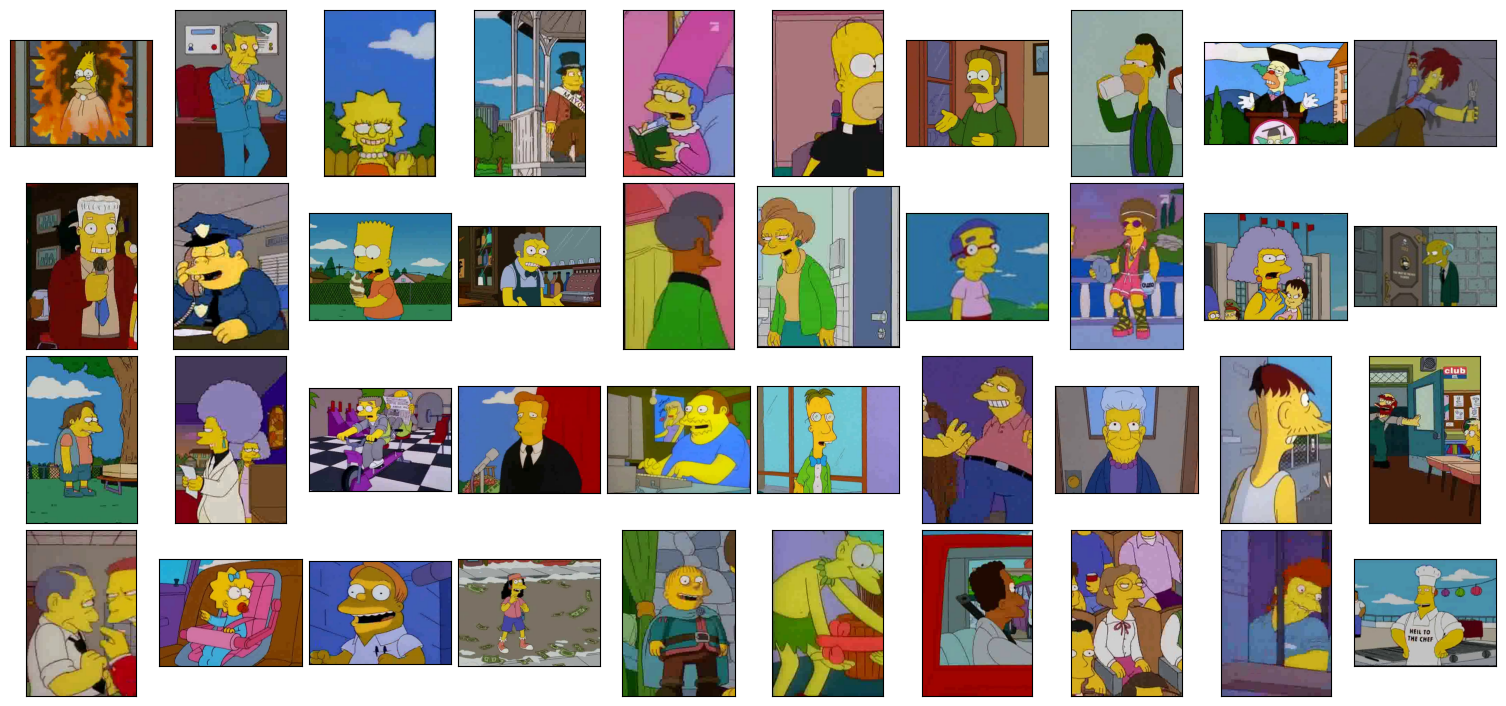

In [5]:
# Create a DataFrame with one Label of each category
df_unique = df.copy().drop_duplicates(subset=["Label"]).reset_index()

# Display 40 picture of the dataset
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
#     ax.set_title(df_unique.Label[i])
plt.tight_layout(pad=0.5)
plt.show()

### Load the Images with a generator

In [5]:
# Separate in train and test data
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=SEED, stratify=df['Label'])

In [6]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [7]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='training',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    subset='validation',
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 26794 validated image filenames belonging to 42 classes.
Found 6698 validated image filenames belonging to 42 classes.
Found 8374 validated image filenames belonging to 42 classes.


In [8]:
X_train, y_train = next(train_images)
X_val, y_val = next(val_images)
X_test, y_test = next(test_images)

# Побудувати i навчити базову модель з єдиним вихiдним шаром softmax. Для створення моделi реалiзувати власний клас. Ваги iнiцiалiзувати невеликими випадковими значеннями, якi нормально розподiленi з нульовим середнiм та одиничною дисперсiєю.

In [9]:
num_classes = len(train_images.class_indices)
print("Total classes:", num_classes)

Total classes: 42


In [10]:
BATCH_SIZE = 192
LEARNING_RATE = 1e-4

In [201]:
class SimpleFeedForwardNetwork(Model):
    def __init__(self, num_classes):
        super(SimpleFeedForwardNetwork, self).__init__()
        self.flatten = Flatten()
        self.dense = Dense(num_classes, activation='softmax', kernel_initializer='random_normal')

    def call(self, inputs):
        x = self.flatten(inputs)
        x = self.dense(x)
        return x

model = SimpleFeedForwardNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model using the fit() function
history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


838/838 [==============================] - 163s 193ms/step - loss: 15.2417 - accuracy: 0.0658 - val_loss: 12.7896 - val_accuracy: 0.0944
Epoch 2/5
838/838 [==============================] - 113s 135ms/step - loss: 11.7221 - accuracy: 0.1185 - val_loss: 10.9895 - val_accuracy: 0.1342
Epoch 3/5
838/838 [==============================] - 133s 159ms/step - loss: 10.3554 - accuracy: 0.1480 - val_loss: 10.0528 - val_accuracy: 0.1524
Epoch 4/5
838/838 [==============================] - 131s 157ms/step - loss: 9.5279 - accuracy: 0.1704 - val_loss: 9.4339 - val_accuracy: 0.1699
Epoch 5/5
838/838 [==============================] - 138s 164ms/step - loss: 8.9418 - accuracy: 0.1888 - val_loss: 8.9699 - val_accuracy: 0.1860


In [57]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 40s 152ms/step - loss: 8.8484 - accuracy: 0.1927
Test Loss: 8.848443031311035
Test Accuracy: 0.19273942708969116


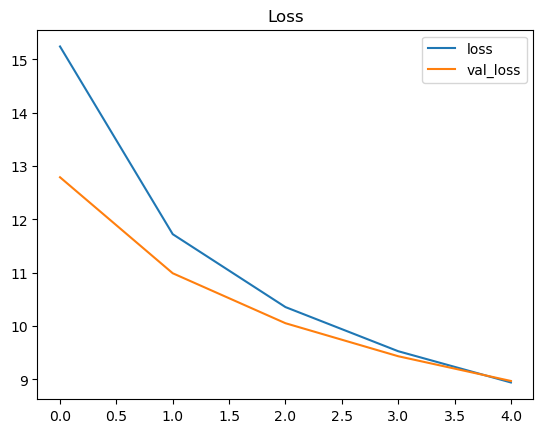

In [202]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

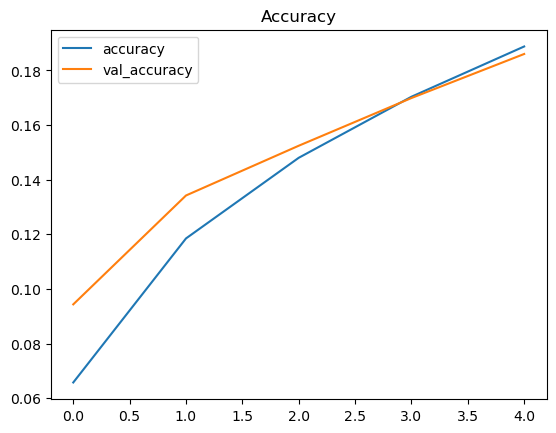

In [203]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

### Пiдiбрати значення гiперпараметра швидкостi навчання.

In [59]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]  # Список значень швидкостей навчання для спроб

best_accuracy = 0.0
best_learning_rate = None

for learning_rate in learning_rates:
    # Створення та компіляція моделі з поточним значенням швидкості навчання
    model = SimpleFeedForwardNetwork(num_classes)
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    
    # Навчання моделі
    history = model.fit(train_images,
                        validation_data=val_images,
                        batch_size=BATCH_SIZE,
                        epochs=5,
                        callbacks=[
                            tf.keras.callbacks.EarlyStopping(
                                monitor='val_loss',
                                patience=5,
                                restore_best_weights=True
                            )
                        ]
    )
    
    # Оцінка точності моделі
    _, accuracy = model.evaluate(test_images)
    
    # Порівняння з найкращим результатом
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = learning_rate

print("Найкраща швидкість навчання:", best_learning_rate)

Epoch 1/5
838/838 [==============================] - 113s 134ms/step - loss: 143.1114 - accuracy: 0.2667 - val_loss: 123.5440 - val_accuracy: 0.3131
Epoch 2/5
838/838 [==============================] - 114s 136ms/step - loss: 93.7651 - accuracy: 0.4077 - val_loss: 94.9631 - val_accuracy: 0.3806
Epoch 3/5
838/838 [==============================] - 113s 135ms/step - loss: 71.4020 - accuracy: 0.4938 - val_loss: 72.0846 - val_accuracy: 0.4576
Epoch 4/5
838/838 [==============================] - 112s 133ms/step - loss: 56.4099 - accuracy: 0.5575 - val_loss: 107.2590 - val_accuracy: 0.4059
Epoch 5/5
262/262 [==============================] - 29s 111ms/step - loss: 79.4816 - accuracy: 0.4660
Epoch 1/5
838/838 [==============================] - 112s 133ms/step - loss: 14.8436 - accuracy: 0.2629 - val_loss: 17.4628 - val_accuracy: 0.3007
Epoch 2/5
838/838 [==============================] - 112s 133ms/step - loss: 9.6598 - accuracy: 0.4077 - val_loss: 12.8676 - val_accuracy: 0.3253
Epoch 3/5
838

### Для вiдображення кривих навчання та вказаних вище графiкiв використати TensorBoard.

Для відображення кривих навчання моделі в TensorBoard, додамо параметри для збереження даних для звітів під час навчанняЗавантажити

In [63]:
# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Додавання звіту TensorBoard під час навчання
history = model.fit(train_images,
                    validation_data=val_images,
                    batch_size=BATCH_SIZE,
                    epochs=5,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=5,
                            restore_best_weights=True
                        ),
                        tensorboard_callback  # Додано звіт TensorBoard
                    ]
)


Epoch 1/5
838/838 [==============================] - 134s 160ms/step - loss: 8.3457 - accuracy: 0.2096 - val_loss: 8.5475 - val_accuracy: 0.2027
Epoch 2/5
838/838 [==============================] - 116s 138ms/step - loss: 7.9701 - accuracy: 0.2210 - val_loss: 8.2600 - val_accuracy: 0.2177
Epoch 3/5
838/838 [==============================] - 112s 134ms/step - loss: 7.6505 - accuracy: 0.2311 - val_loss: 8.0143 - val_accuracy: 0.2253
Epoch 4/5
838/838 [==============================] - 116s 138ms/step - loss: 7.3713 - accuracy: 0.2405 - val_loss: 7.8163 - val_accuracy: 0.2307
Epoch 5/5
838/838 [==============================] - 116s 138ms/step - loss: 7.1257 - accuracy: 0.2485 - val_loss: 7.6334 - val_accuracy: 0.2345


Після запуску цього коду буде створена папка зі звітами TensorBoard. Переглянемо ці звіти:

In [220]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### Чи має мiсце перенавчання побудованої моделі?

Для того, аби уникнути перенавчання, був використаний метод EarlyStopping (Таким чином, було виконано ще один пукт з ТЗ: "Реалiзувати спосiб регуляризацiї мереж ранню зупинку навчання мережi"). На графіку нижче бачимо, що перенавчання не відбувається, оскільки функція втрат на тренувальній та тестовій вибірці падають приблизно рівномірно. На наступній епосі, як очевидно з графіка, модель очікувало би перенавчання, проте процес тренування було вчасно зупинено

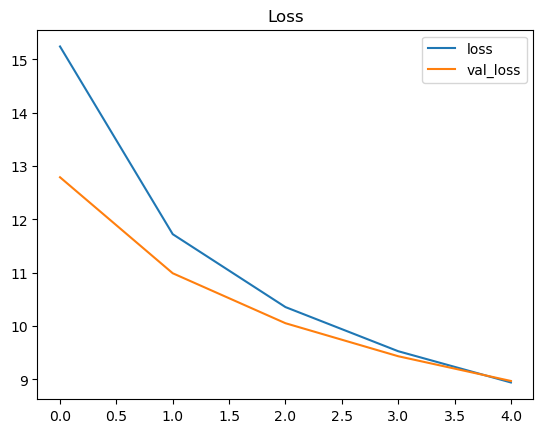

In [202]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### Зберегти контрольнi точки через фiксованi iнтервали пiд час навчання. В кiнцi навчання зберегти результуючi моделi. Вiдновити останню контрольну точку при запуску моделi, якщо навчання було перервано.

Для збереження контрольних точок моделі на фіксованих інтервалах часу використаємо callback ModelCheckpoint. Після кожної епохи модель будемо зберігати контрольну точку в файл cp.ckpt у папці checkpoints

In [75]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=best_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)

# Додавання callback ModelCheckpoint
history = model.fit(train_images,
                    validation_data=val_images,
                    batch_size=BATCH_SIZE,
                    epochs=5,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=5,
                            restore_best_weights=True
                        ),
                        tensorboard_callback,
                        checkpoint_callback  # Додано callback ModelCheckpoint
                    ]
)


Epoch 1/5
838/838 [==============================] - ETA: 0s - loss: 3.1184 - accuracy: 0.6931
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 110s 130ms/step - loss: 3.1184 - accuracy: 0.6931 - val_loss: 4.9890 - val_accuracy: 0.5893
Epoch 2/5
838/838 [==============================] - ETA: 0s - loss: 2.3974 - accuracy: 0.7372
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 107s 128ms/step - loss: 2.3974 - accuracy: 0.7372 - val_loss: 5.5288 - val_accuracy: 0.5709
Epoch 3/5
838/838 [==============================] - ETA: 0s - loss: 2.0129 - accuracy: 0.7707
Epoch 3: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 112s 134ms/step - loss: 2.0129 - accuracy: 0.7707 - val_loss: 4.7902 - val_accuracy: 0.6185
Epoch 4/5
838/838 [==============================] - ETA: 0s - loss: 1.5516 - accuracy: 0.8018
Epoch 4: saving model to checkpoints/cp.ckpt
838/838 [==========================

Одразу підготуємо код, щоб відновити останню контрольну точку, якщо навчання буде перервано. Цей код перевіряє, чи існує остання контрольна точка у папці checkpoints і відновлює ваги моделі з цієї точки перед продовженням навчання:

In [79]:
# Відновлення останньої контрольної точки
latest_checkpoint = tf.train.latest_checkpoint("checkpoints")
if latest_checkpoint:
    model.load_weights(latest_checkpoint)

# Продовження навчання
history = model.fit(train_images,
                    validation_data=val_images,
                    batch_size=BATCH_SIZE,
                    epochs=2,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=1,
                            restore_best_weights=True
                        ),
                        tensorboard_callback,
                        checkpoint_callback
                    ]
)


Epoch 1/2
838/838 [==============================] - ETA: 0s - loss: 0.6110 - accuracy: 0.8964
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 111s 133ms/step - loss: 0.6110 - accuracy: 0.8964 - val_loss: 3.9958 - val_accuracy: 0.6805
Epoch 2/2
838/838 [==============================] - ETA: 0s - loss: 0.5547 - accuracy: 0.9058
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 135s 161ms/step - loss: 0.5547 - accuracy: 0.9058 - val_loss: 3.7058 - val_accuracy: 0.7157


### Evaluation

In [81]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 33s 124ms/step


In [82]:
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 72.12%


In [83]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.80      0.74      0.77       365
           agnes_skinner       0.70      0.41      0.52        17
  apu_nahasapeemapetilon       0.85      0.78      0.82       249
           barney_gumble       0.69      0.81      0.75        42
            bart_simpson       0.65      0.68      0.67       537
            carl_carlson       0.82      0.72      0.77        39
charles_montgomery_burns       0.74      0.65      0.69       477
            chief_wiggum       0.63      0.82      0.71       394
         cletus_spuckler       0.75      0.79      0.77        19
          comic_book_guy       0.80      0.78      0.79       188
               disco_stu       0.75      1.00      0.86         3
          edna_krabappel       0.41      0.84      0.55       183
                fat_tony       0.67      0.73      0.70        11
                     gil       0.80      0.73      0.76        11
    groun

### Використати обрану модель для розпiзнавання одного iз зображень перевiрочної множини

Розпізнаємо не одне, а 15 зображень

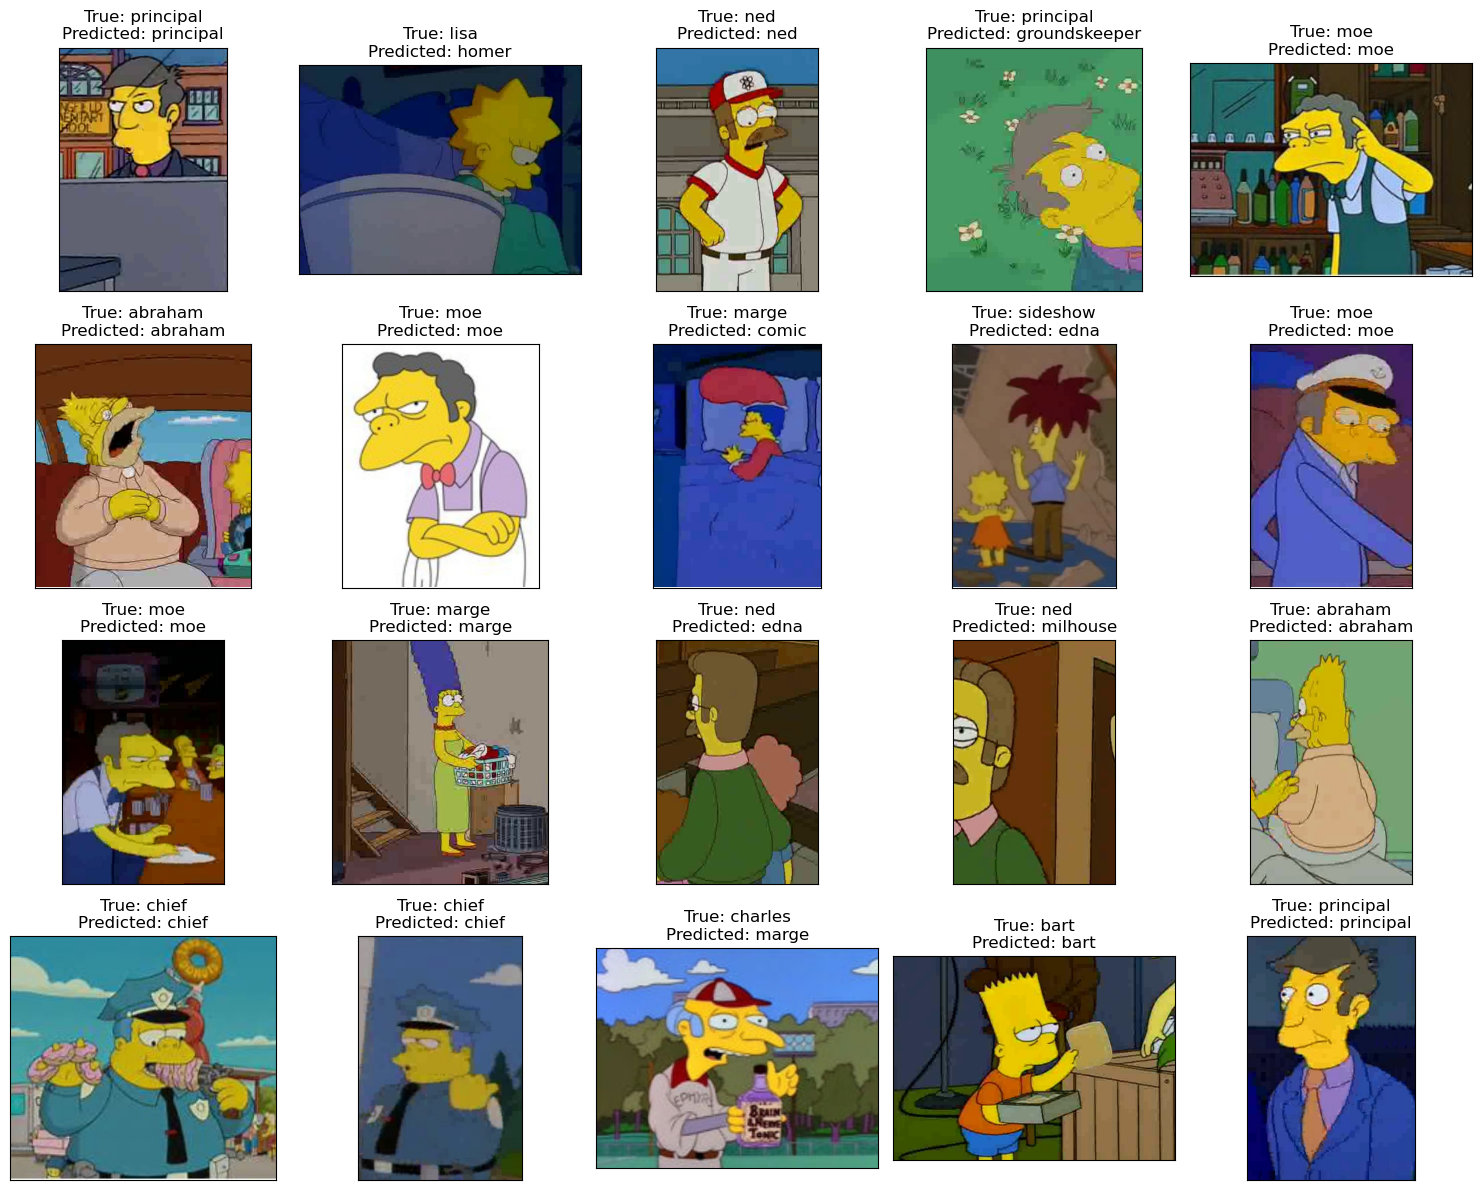

In [84]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}")
plt.tight_layout()
plt.show()

Можемо зробити висновок, що базова модель з єдиним вихiдним шаром softmax справляється із задачею лише в деяких випадках

### Спробувати створити нове зображення, подiбне до зображень у заданому наборi даних. Розпiзнати це зображення за допомогою моделi

Протестуємо роботу моделі на зібраних з інтернету картинках

In [97]:
custom_dir = Path('../input/simpsons-data')
custom_filepaths = list(custom_dir.glob(r'**/*.jpeg'))

In [98]:
custom_labels = ['homer_simpson', 'lionel_hutz', 'abraham_grampa_simpson','homer_simpson', 'agnes_skinner', 'bart_simpson', 'homer_simpson', 'gil']

In [99]:
def predict_custom(custom_image, print_image=True):
    original_image = imread(custom_image)
    cropped_image = original_image
    shape = original_image.shape
    if shape[0] < shape[1]:
        margin = int((shape[1] - shape[0])/2)
        cropped_image = original_image[:, margin:-margin]
    if shape[0] > shape[1]:
        margin = int((shape[0] - shape[1])/2)
        cropped_image = original_image[margin:-margin]
    image = resize(cropped_image, (224, 224))
    if print_image:
        plt.imshow(image)
    prediction = model.predict(image[None, ...])
    
    prediction = np.argmax(prediction, axis=1)
    labels = (train_images.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    prediction = [labels[k] for k in prediction]
    return prediction

1/1 [==============================] - 0s 26ms/step


['abraham_grampa_simpson']

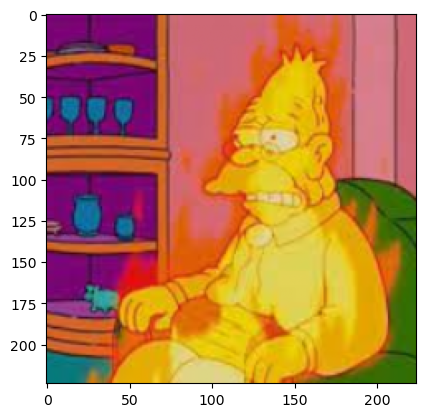

In [209]:
predict_custom(custom_filepaths[2])

1/1 [==============================] - 0s 26ms/step


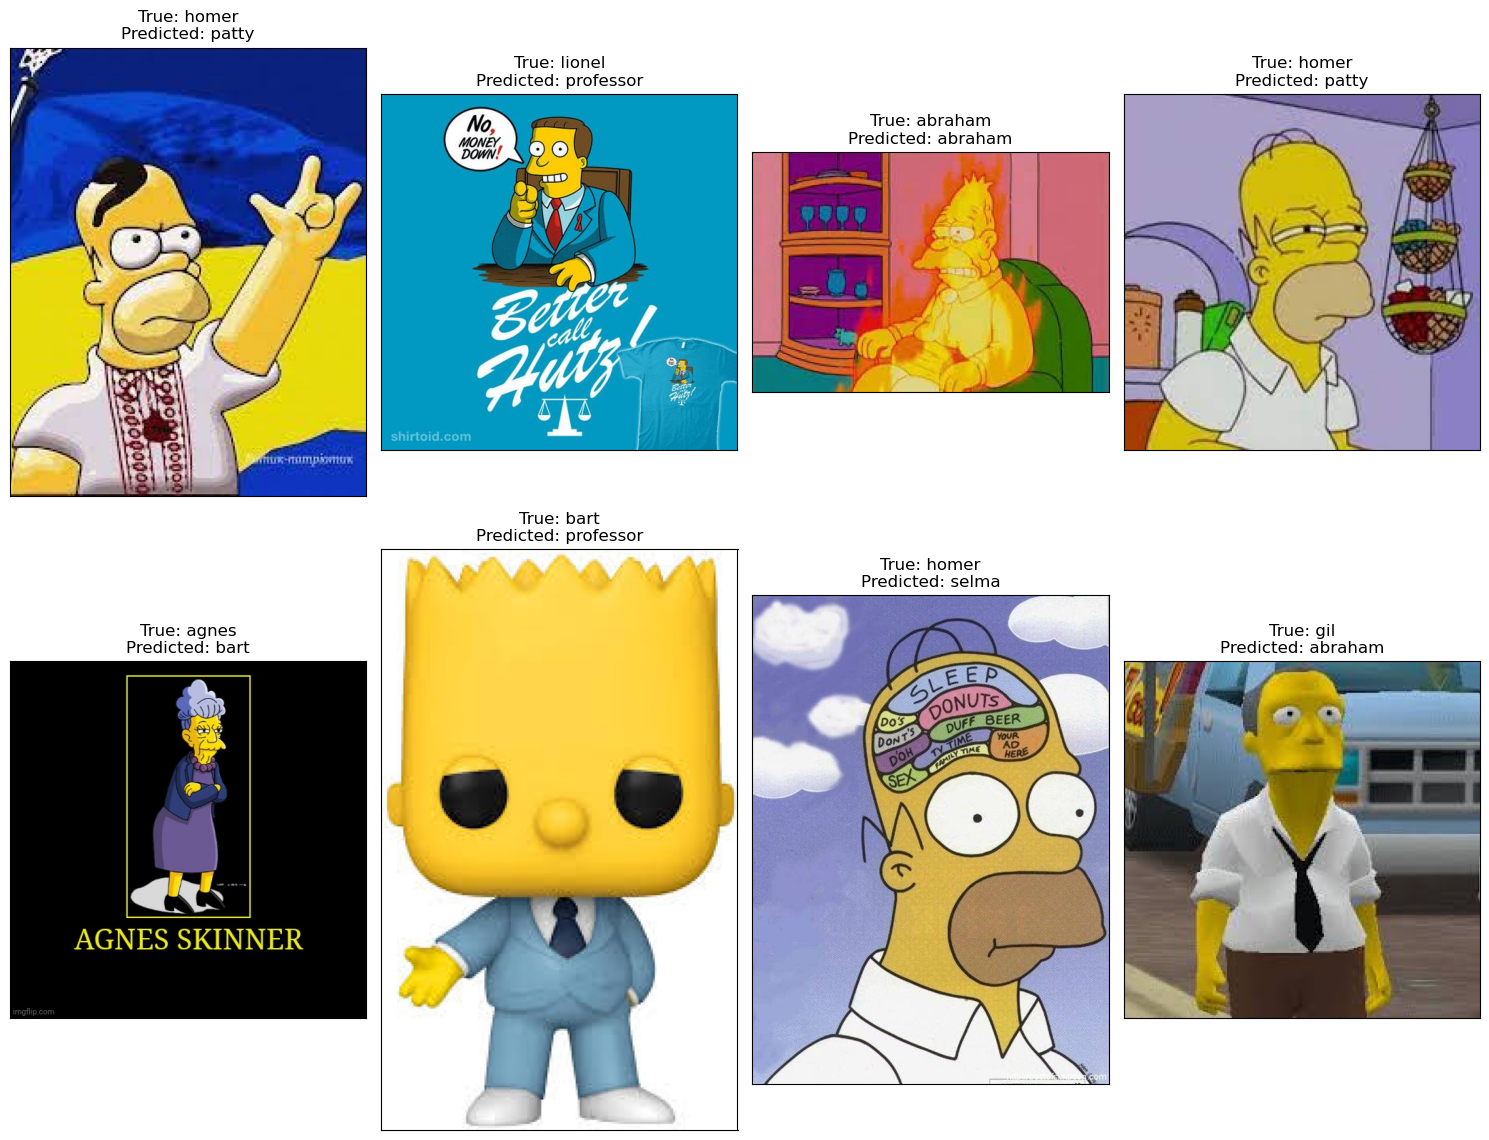

In [214]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(custom_filepaths[i]))
    ax.set_title(f"True: {custom_labels[i].split('_')[0]}\nPredicted: {predict_custom(custom_filepaths[i], print_image = False)[0].split('_')[0]}")
plt.tight_layout()
plt.show()

З власними зображеннями модель справляється ще гірше.

# Побудувати глибокi моделi з кiлькома скритими шарами ReLU або tanh

### Network with hidden **tanh**-layers

In [216]:
class TanhNetwork(Model):
    def __init__(self, num_classes):
        super(TanhNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(512, activation='tanh', kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm1 = BatchNormalization()
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm2 = BatchNormalization()
        self.dropout2 = Dropout(0.5)
        self.hidden3 = Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm3 = BatchNormalization()
        self.dropout3 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.batchnorm1(x, training=training)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.batchnorm2(x, training=training)
        x = self.dropout2(x, training=training)
        x = self.hidden3(x)
        x = self.batchnorm3(x, training=training)
        x = self.dropout3(x, training=training)
        output = self.output_layer(x)
        return output
    

model = TanhNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)

# Train the model using the fit() function
history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=1,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

Epoch 1/2
838/838 [==============================] - ETA: 0s - loss: 5.9961 - accuracy: 0.0730
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 925s 1s/step - loss: 5.9961 - accuracy: 0.0730 - val_loss: 4.8546 - val_accuracy: 0.2293
Epoch 2/2
838/838 [==============================] - ETA: 0s - loss: 5.5880 - accuracy: 0.1258
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 988s 1s/step - loss: 5.5880 - accuracy: 0.1258 - val_loss: 4.7219 - val_accuracy: 0.2599


In [222]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 49s 185ms/step - loss: 4.7393 - accuracy: 0.2619
Test Loss: 4.73929500579834
Test Accuracy: 0.2618820071220398


In [ ]:
tensorboard --logdir logs/fit

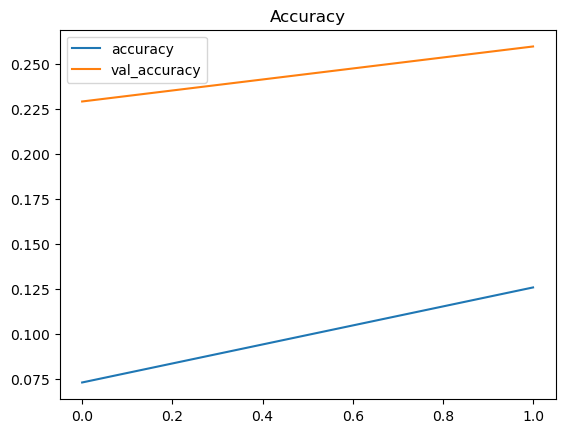

In [224]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

### Evaluation

In [225]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 49s 187ms/step


In [227]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.24      0.10      0.14       365
           agnes_skinner       1.00      0.00      0.00        17
  apu_nahasapeemapetilon       0.31      0.34      0.32       249
           barney_gumble       1.00      0.00      0.00        42
            bart_simpson       0.25      0.23      0.24       537
            carl_carlson       1.00      0.03      0.05        39
charles_montgomery_burns       0.21      0.23      0.22       477
            chief_wiggum       0.26      0.38      0.31       394
         cletus_spuckler       1.00      0.00      0.00        19
          comic_book_guy       0.24      0.04      0.06       188
               disco_stu       1.00      0.00      0.00         3
          edna_krabappel       0.00      0.00      0.00       183
                fat_tony       1.00      0.00      0.00        11
                     gil       1.00      0.00      0.00        11
    groun

### Чи має мiсце перенавчання побудованої моделі?

Для того, аби уникнути перенавчання, були використаниі методи L2 regularization, Dropout (Таким чином, було виконано відповідні пукти з ТЗ). На графіку нижче бачимо, що перенавчання не відбувається, оскільки функція втрат на тренувальній та тестовій вибірці падає рівномірно (на обох графіках)

Метод L2 регуляризації допомагає контролювати загальну складність моделі, штрафуючи великі значення ваг. Це допомагає уникнути перенавчання, оскільки модель намагатиметься зменшити ваги, щоб знизити загальну втрату.

Dropout випадково вимикає деякі нейрони під час тренування, що допомагає запобігти перенавчанню шляхом зменшення залежності між конкретними нейронами. Це змушує модель бути більш гнучкою і допомагає уникнути перенавчання.

### Зробити висновки щодо якостi навчання мережi з i без використання дропаута.
При порівнянні якості навчання мережі з та без використання дропауту можна зробити наступні спостереження:

1) Ефект регуляризації: Дропаут вводить регуляризацію в мережу шляхом випадкового відключення окремих нейронів під час навчання. Це допомагає запобігти перенавчанню, особливо коли мережа має велику кількість параметрів. Без дропауту мережа може бути більш схильною до перенавчання, що призводить до меншої загальної продуктивності на нових даних.

2) Загальна продуктивність: Запобігаючи перенавчання, дропаут може покращити загальну продуктивність мережі. Він допомагає мережі вивчати більш стійкі особливості, які добре узагальнюються на нові дані. Це особливо корисно, коли навчальні дані обмежені.

3) Час навчання: Дропаут вводить шум і випадковість під час навчання, що може уповільнити процес навчання. Кожна ітерація навчання з дропаутом вимагає додаткових обчислень через відключення окремих нейронів. У результаті, навчання з використанням дропауту може зайняти більше часу порівняно з навчанням без дропауту.


### Як треба змiнювати значення iмовiрностi p якщо мережа перенавчається?

Якщо мережа перенавчається, тобто точність на тренувальному наборі даних значно вища, ніж на валідаційному наборі, можна збільшити ймовірність дропауту. Це сприяє відключенню більшої кількості нейронів

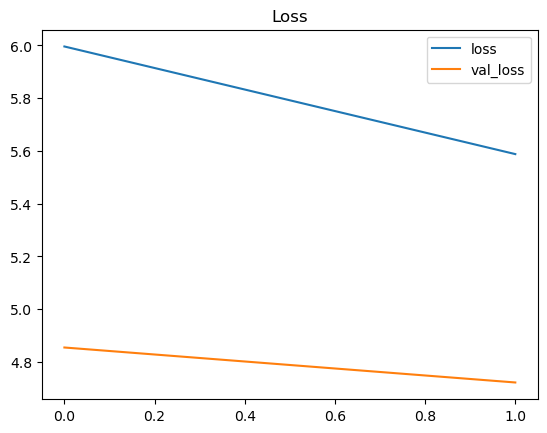

In [223]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### Network with hidden **ReLU**-layers

In [229]:
class ReLUNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(ReLUNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.001))
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001))
        self.dropout2 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.dropout2(x, training=training)
        output = self.output_layer(x)
        return output

model = ReLUNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)


# Train the model using the fit() function
history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


838/838 [==============================] - ETA: 0s - loss: 6.1563 - accuracy: 0.0874
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 561s 667ms/step - loss: 6.1563 - accuracy: 0.0874 - val_loss: 4.0619 - val_accuracy: 0.1680
Epoch 2/5
838/838 [==============================] - ETA: 0s - loss: 4.9632 - accuracy: 0.1263
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 556s 664ms/step - loss: 4.9632 - accuracy: 0.1263 - val_loss: 3.9272 - val_accuracy: 0.1914
Epoch 3/5
838/838 [==============================] - ETA: 0s - loss: 4.4233 - accuracy: 0.1385
Epoch 3: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 567s 677ms/step - loss: 4.4233 - accuracy: 0.1385 - val_loss: 3.8123 - val_accuracy: 0.2050
Epoch 4/5
838/838 [==============================] - ETA: 0s - loss: 4.1909 - accuracy: 0.1475
Epoch 4: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 52

In [231]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 56s 214ms/step - loss: 3.6068 - accuracy: 0.2176
Test Loss: 3.606797695159912
Test Accuracy: 0.2175782173871994


In [232]:
tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 3437), started 1:00:25 ago. (Use '!kill 3437' to kill it.)

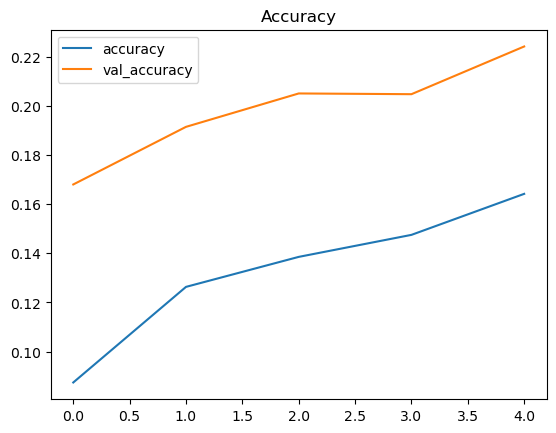

In [234]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

## Evaluation

In [235]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 47s 178ms/step


In [236]:
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 21.76%


In [238]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.33      0.04      0.07       365
           agnes_skinner       0.00      0.00      0.00        17
  apu_nahasapeemapetilon       0.62      0.29      0.40       249
           barney_gumble       1.00      0.00      0.00        42
            bart_simpson       0.22      0.34      0.26       537
            carl_carlson       0.00      0.00      0.00        39
charles_montgomery_burns       0.12      0.01      0.02       477
            chief_wiggum       0.66      0.28      0.39       394
         cletus_spuckler       1.00      0.00      0.00        19
          comic_book_guy       0.62      0.05      0.10       188
               disco_stu       1.00      0.00      0.00         3
          edna_krabappel       0.33      0.01      0.01       183
                fat_tony       1.00      0.00      0.00        11
                     gil       1.00      0.00      0.00        11
    groun

### Чи має мiсце перенавчання побудованих моделей?

Для того, аби уникнути перенавчання, були використаниі методи L1 regularization, Dropout (Таким чином, було виконано відповідні пукти з ТЗ). На графіку нижче бачимо, що перенавчання не відбувається, оскільки не настає моменту, коли функція втрат на тренувальній вибірці падає нижче, ніж на тестовій 

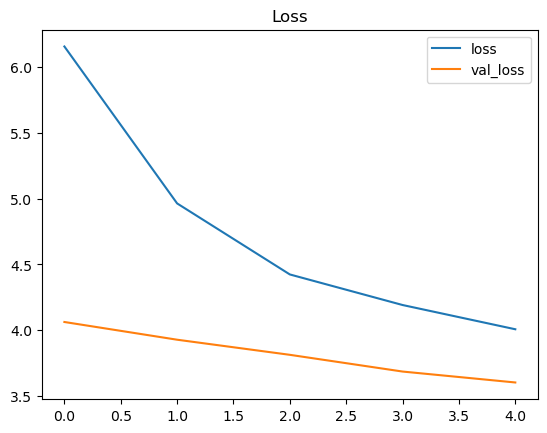

In [233]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

# Моделi iз симетричними функцiями активацiї tanh навчити методом ґрадiєнтного спуску, використовуючи iнiцiалiзацiю ваг Глоро.

In [241]:
class TanhNetwork(Model):
    def __init__(self, num_classes):
        super(TanhNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(512, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm1 = BatchNormalization()
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(256, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm2 = BatchNormalization()
        self.dropout2 = Dropout(0.5)
        self.hidden3 = Dense(128, activation='tanh', kernel_initializer='glorot_uniform', kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm3 = BatchNormalization()
        self.dropout3 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.batchnorm1(x, training=training)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.batchnorm2(x, training=training)
        x = self.dropout2(x, training=training)
        x = self.hidden3(x)
        x = self.batchnorm3(x, training=training)
        x = self.dropout3(x, training=training)
        output = self.output_layer(x)
        return output
    

model = TanhNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)


# Train the model using the fit() function
history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

Epoch 1/5
838/838 [==============================] - ETA: 0s - loss: 5.9659 - accuracy: 0.0747
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 1118s 1s/step - loss: 5.9659 - accuracy: 0.0747 - val_loss: 4.8528 - val_accuracy: 0.2153
Epoch 2/5
838/838 [==============================] - ETA: 0s - loss: 5.5312 - accuracy: 0.1311
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 1025s 1s/step - loss: 5.5312 - accuracy: 0.1311 - val_loss: 4.6804 - val_accuracy: 0.2513
Epoch 3/5
838/838 [==============================] - ETA: 0s - loss: 5.3206 - accuracy: 0.1546
Epoch 3: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 992s 1s/step - loss: 5.3206 - accuracy: 0.1546 - val_loss: 4.6040 - val_accuracy: 0.2681
Epoch 4/5
838/838 [==============================] - ETA: 0s - loss: 5.1076 - accuracy: 0.1709
Epoch 4: saving model to checkpoints/cp.ckpt
838/838 [==============================] -

In [243]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 37s 141ms/step - loss: 4.3938 - accuracy: 0.2799
Test Loss: 4.39381217956543
Test Accuracy: 0.2799140214920044


In [244]:
tensorboard --logdir logs/fit

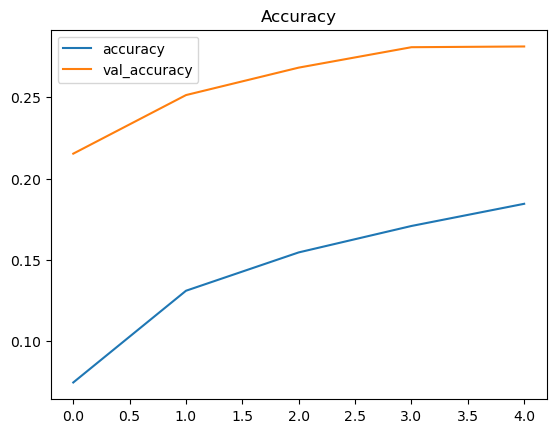

In [246]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

### Evaluation

In [247]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 35s 133ms/step


In [248]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.22      0.11      0.15       365
           agnes_skinner       1.00      0.00      0.00        17
  apu_nahasapeemapetilon       0.43      0.32      0.37       249
           barney_gumble       1.00      0.00      0.00        42
            bart_simpson       0.26      0.34      0.29       537
            carl_carlson       1.00      0.00      0.00        39
charles_montgomery_burns       0.20      0.36      0.26       477
            chief_wiggum       0.27      0.45      0.34       394
         cletus_spuckler       1.00      0.00      0.00        19
          comic_book_guy       0.29      0.06      0.10       188
               disco_stu       1.00      0.00      0.00         3
          edna_krabappel       0.00      0.00      0.00       183
                fat_tony       1.00      0.00      0.00        11
                     gil       1.00      0.00      0.00        11
    groun

### Чи має мiсце перенавчання побудованих моделей?

Для того, аби уникнути перенавчання, були використаниі методи L2 regularization, Dropout (Таким чином, було виконано відповідні пукти з ТЗ). На графіку нижче бачимо, що перенавчання не відбувається, оскільки не настає моменту, коли функція втрат на тренувальній вибірці падає нижче, ніж на функція тестовій 

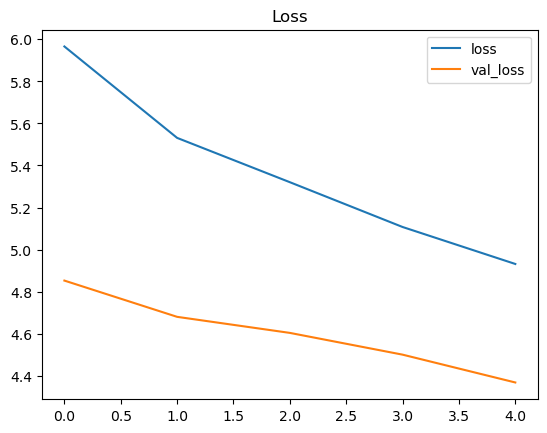

In [245]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### Який метод iнiцiалiзацiї: традицiйний чи Глоро дає меншi значення показника accuracy?

метод традиційний - accuracy: 0.26188

метод Глоро - accuracy: 0.2799

Отже, метод ініціалізації Глоро все-таки краще підходить для нашої задачі та архітектури моделі

# Моделi iз несиметричними функцiями активацiї ReLU навчити методом ґрадiєнтного спуску, використовуючи iнiцiалiзацiю ваг Хе.

In [11]:
class ReLUNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(ReLUNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001))
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001))
        self.dropout2 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.dropout2(x, training=training)
        output = self.output_layer(x)
        return output

#     def loss_with_regularization(y_true, y_pred):
#         loss_value = tf.keras.losses.categorical_crossentropy(y_true, y_pred)
#         regularization = tf.reduce_sum(model.losses)
#         return loss_value + regularization

model = ReLUNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)


# Train the model using the fit() function
history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


838/838 [==============================] - ETA: 0s - loss: 6.8919 - accuracy: 0.0828
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 455s 541ms/step - loss: 6.8919 - accuracy: 0.0828 - val_loss: 4.4210 - val_accuracy: 0.1617
Epoch 2/5
838/838 [==============================] - ETA: 0s - loss: 5.6212 - accuracy: 0.1125
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 460s 548ms/step - loss: 5.6212 - accuracy: 0.1125 - val_loss: 4.1370 - val_accuracy: 0.1821
Epoch 3/5
838/838 [==============================] - ETA: 0s - loss: 4.9011 - accuracy: 0.1237
Epoch 3: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 426s 508ms/step - loss: 4.9011 - accuracy: 0.1237 - val_loss: 4.0786 - val_accuracy: 0.1775
Epoch 4/5
838/838 [==============================] - ETA: 0s - loss: 4.5994 - accuracy: 0.1326
Epoch 4: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 40

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 78s 296ms/step - loss: 3.9570 - accuracy: 0.1735
Test Loss: 3.956953287124634
Test Accuracy: 0.1735132485628128


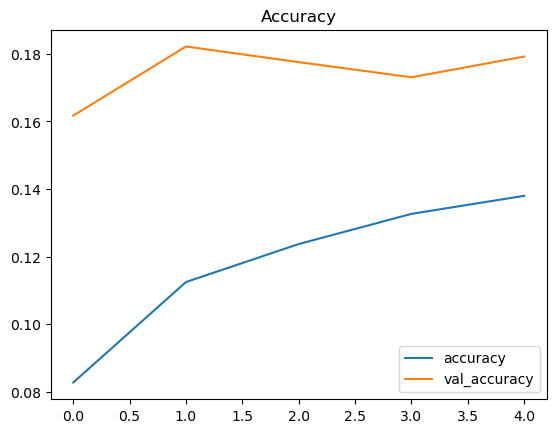

In [16]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

### Evaluation

In [19]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 34s 130ms/step


### Чи має мiсце перенавчання побудованих моделей?

Для того, аби уникнути перенавчання, були використаниі методи L2 regularization, Dropout (Таким чином, було виконано відповідні пукти з ТЗ). На графіку нижче бачимо, що перенавчання не відбувається, оскільки не настає моменту, коли функція втрат на тренувальній вибірці падає нижче, ніж на тестовій 

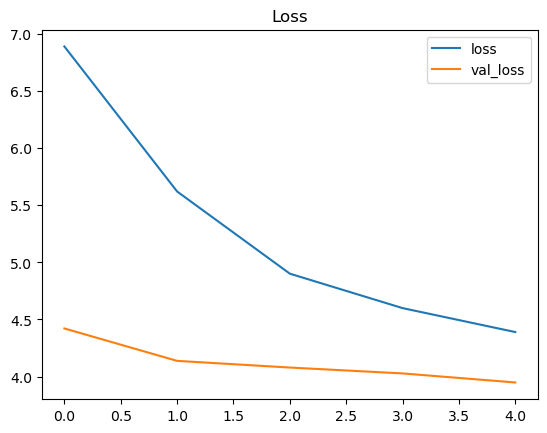

In [15]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### Який метод iнiцiалiзацiї: традицiйний чи Хе дає меншi значення показника accuracy?

метод традиційний - accuracy: 0.217578

метод Хе - accuracy: 0.1735

Отже, традиційний метод ініціалізації краще підходить для нашої задачі та архітектури моделі, ніж метод Хе

#  Обрати для нейронiв скритих шарiв рiзнi функцiї активацiї: LeakyReLU, Parametric LeakyReLU, ELU. 
Спробувати з’ясувати чи впливає вибiр функцiї активацiї на:

• час навчання мережi,

• якiсть роботи мережi на перевiрочнiй множинi,

• час надання прогнозу мережею.

### LeakyReLU

In [28]:
class BaseNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(BaseNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(256, kernel_regularizer=regularizers.l2(0.001))
        self.activation1 = LeakyReLU()
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(128, kernel_regularizer=regularizers.l2(0.001))
        self.activation2 = LeakyReLU()
        self.dropout2 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.dropout2(x, training=training)
        output = self.output_layer(x)
        return output

model = BaseNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)



start_time = time.time()

history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

end_time = time.time()
execution_time = end_time - start_time

clear_output()
lrelu_res = pd.Series({k:v[-1] for k, v in history.history.items()})
lrelu_res


loss            5.497348
accuracy        0.281369
val_loss        3.138747
val_accuracy    0.452374
dtype: float64

In [29]:
print("Execution time:", execution_time, "seconds")

Execution time: 2237.8442969322205 seconds


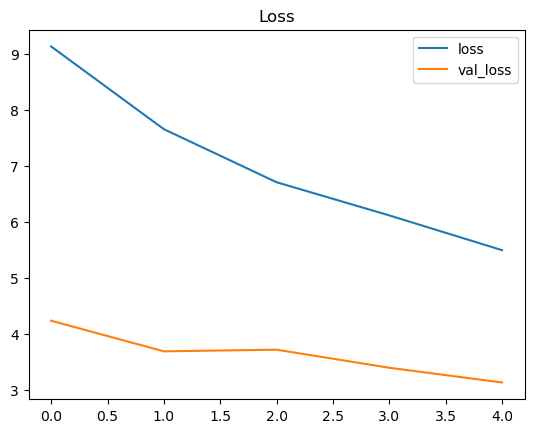

In [30]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

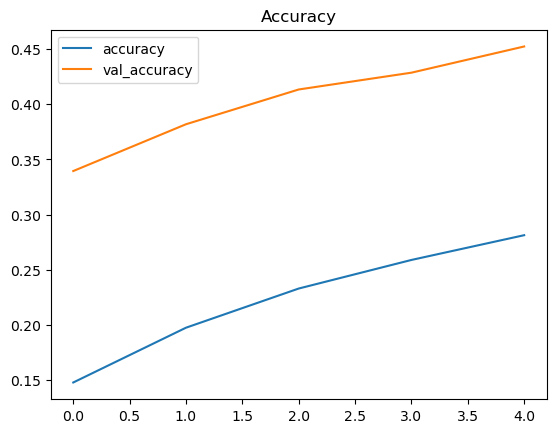

In [31]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [32]:
start_time = time.time()
pred = model.predict(test_images)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 44s 166ms/step
Execution time: 82.23357033729553 seconds


### PReLU

In [39]:
class BaseNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(BaseNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(256, kernel_regularizer=regularizers.l2(0.001))
        self.activation1 = PReLU()
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(128, kernel_regularizer=regularizers.l2(0.001))
        self.activation2 = PReLU()
        self.dropout2 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.dropout2(x, training=training)
        output = self.output_layer(x)
        return output

model = BaseNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)

start_time = time.time()

history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

end_time = time.time()
execution_time = end_time - start_time

clear_output()
lrelu_res = pd.Series({k:v[-1] for k, v in history.history.items()})
lrelu_res

loss            3.968095
accuracy        0.163283
val_loss        3.556647
val_accuracy    0.223798
dtype: float64

In [ ]:
print("Execution time:", execution_time, "seconds")

Execution time: 2228.458922624588 seconds


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 40s 151ms/step - loss: 3.5777 - accuracy: 0.2222
Test Loss: 3.5776596069335938
Test Accuracy: 0.22223548591136932


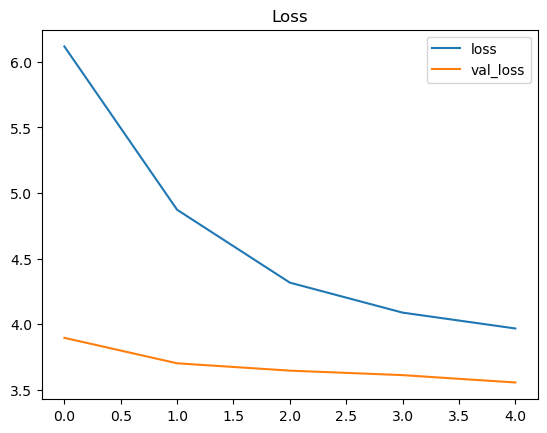

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

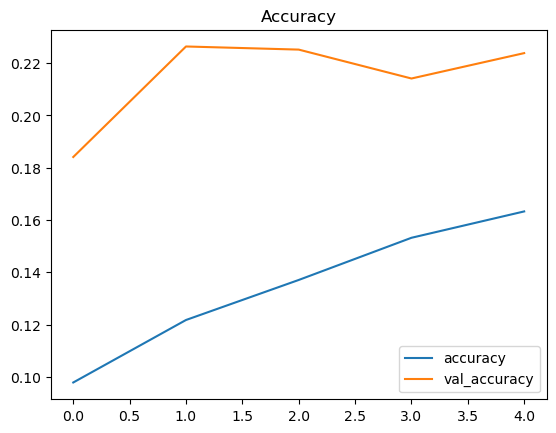

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [ ]:
start_time = time.time()
pred = model.predict(test_images)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 31s 116ms/step
Execution time: 41.246978998184204 seconds


### ELU

In [ ]:
class BaseNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(BaseNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(256, kernel_regularizer=regularizers.l2(0.001))
        self.activation1 = ELU()
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(128, kernel_regularizer=regularizers.l2(0.001))
        self.activation2 = ELU()
        self.dropout2 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.activation1(x)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.activation2(x)
        x = self.dropout2(x, training=training)
        output = self.output_layer(x)
        return output

model = BaseNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),#learning_rate=0.001
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)

start_time = time.time()

history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

end_time = time.time()
execution_time = end_time - start_time

clear_output()
lrelu_res = pd.Series({k:v[-1] for k, v in history.history.items()})
lrelu_res

loss            5.180161
accuracy        0.167649
val_loss        3.648605
val_accuracy    0.275754
dtype: float64

In [ ]:
print("Execution time:", execution_time, "seconds")

Execution time: 2197.325876235962 seconds


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_images)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

262/262 [==============================] - 42s 160ms/step - loss: 3.6949 - accuracy: 0.2664
Test Loss: 3.694873809814453
Test Accuracy: 0.2664198577404022


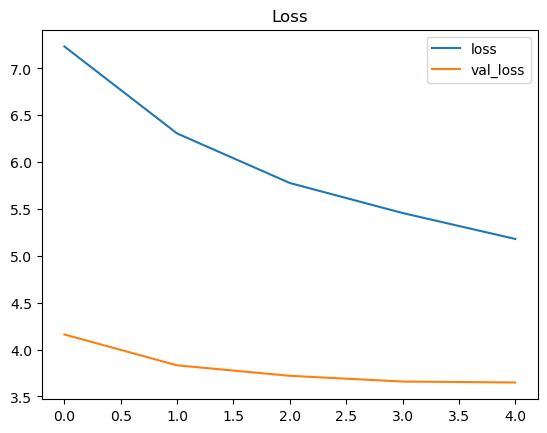

In [ ]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

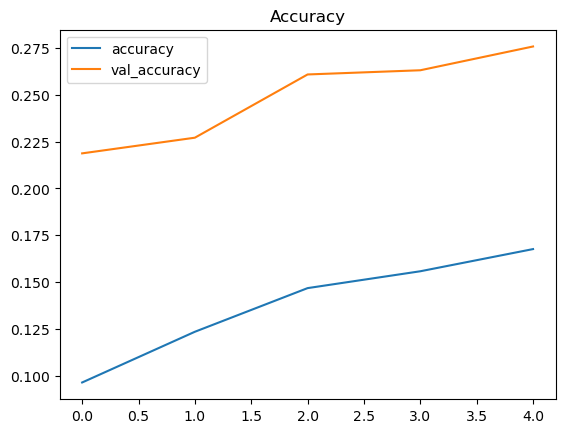

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [ ]:
start_time = time.time()
pred = model.predict(test_images)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 31s 119ms/step
Execution time: 31.64281439781189 seconds


### Час навчання мережі

Деякі функції активації, як ReLU, LeakyReLU та ELU, можуть прискорити процес навчання. Це через їхню нелінійну природу, яка може сприяти швидкому розповсюдженню градієнту під час зворотного поширення помилки. У нашому випадку, ELU тренується найшвидше, Leaky ReLU - найповільніше

Leaky ReLU: 2237.844 sec

PReLU: 2228.4589 sec

ELU: 2197.326 sec

### Якість роботи мережі на перевірочній множині

- Деякі функції активації, такі як ReLU, зазвичай добре справляються з різними завданнями та можуть покращити точність моделі.
- Деякі функції активації, такі як LeakyReLU та ELU, можуть допомогти уникнути проблеми "мертвих" нейронів, яка може виникати при використанні симетричних функцій активації, таких як tanh.

Як бачимо нижче, найкращі результати показала модель з функцією активації Leaky ReLU

ReLU: 0.2175 accuracy

Leaky ReLU: 0.281369 accuracy

PReLU: 0.163 accuracy

ELU: 0.2664 accuracy


### Час надання прогнозу мережею

 - Функція активації може впливати на швидкодію прогнозування моделі, оскільки вона використовується під час передачі сигналу через мережу.
 - Деякі функції активації, як ReLU, є обчислювально ефективними та можуть прискорити час надання прогнозу.
 - У деяких випадках, функції активації з більш складними обчислювальними операціями, такі як ELU, можуть тривати трохи більше часу на надання прогнозу.
 
 Як бачимо, в нашому випадку Leaky ReLU надовше прогнозувала тестову вибірку

Leaky ReLU: 82.233 sec

PReLU: 41.247 sec

ELU: 31.643 sec

# Замiсть методу ґрадiєнтного спуску використати один з адаптивних методiв: прискорений градiєнт Нестерова, Adagrad, Adadelta, Adam, ваги iнiцiалiзувати наведеними вище способами. 
Побудувати аналогiчнi графiки змiни значень функцiї втрат та змiни показника accuracy.

### Nesterov Accelerated Gradient (NAG) optimizer

In [57]:
model = BaseNetwork(num_classes)

# Use Nesterov Accelerated Gradient (NAG) optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)
# Train the model
history = model.fit(train_images,
                    validation_data=val_images,
                    batch_size=32,
                    epochs=5, 
                    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ])

Epoch 1/5
838/838 [==============================] - ETA: 0s - loss: 5.1263 - accuracy: 0.0686
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 374s 446ms/step - loss: 5.1263 - accuracy: 0.0686 - val_loss: 4.1629 - val_accuracy: 0.0593
Epoch 2/5
838/838 [==============================] - ETA: 0s - loss: 4.1621 - accuracy: 0.0759
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 387s 461ms/step - loss: 4.1621 - accuracy: 0.0759 - val_loss: 3.8819 - val_accuracy: 0.0646
Epoch 3/5
838/838 [==============================] - ETA: 0s - loss: 3.9068 - accuracy: 0.0739
Epoch 3: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 394s 471ms/step - loss: 3.9068 - accuracy: 0.0739 - val_loss: 3.6804 - val_accuracy: 0.1066
Epoch 4/5
838/838 [==============================] - ETA: 0s - loss: 3.7310 - accuracy: 0.0751
Epoch 4: saving model to checkpoints/cp.ckpt
838/838 [==========================

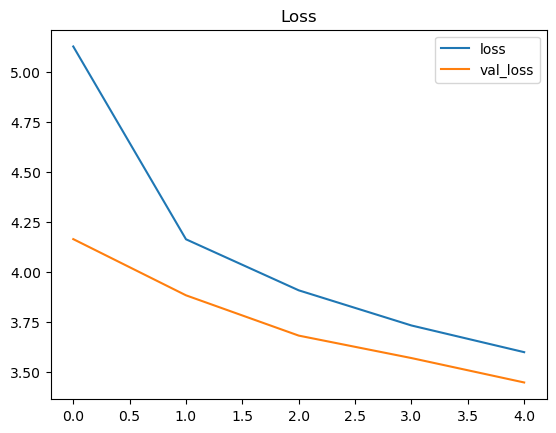

In [59]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

### Adagrad, Adadelta, Adam

In [60]:
results = pd.DataFrame()
for optimizer in ['SGD', 'Adagrad', 'Adadelta', 'Adam']:
    print("Optimizer: ", optimizer)
    
    model = BaseNetwork(num_classes)

    # Compile the model with the desired loss function, optimizer, and metrics
    model.compile(optimizer=optimizer,
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

    # Створення об'єкту TensorBoard
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

    # Імпортування необхідного модуля
    checkpoint_path = "checkpoints/cp.ckpt"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)
    # Train the model
    history = model.fit(train_images,
                    validation_data=val_images,
                    batch_size=32,
                    epochs=5, 
                    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        TensorBoard(log_dir=f"logs/elu_{optimizer}/"),
        checkpoint_callback
    ])
    
    model.save(f'models/elu_{optimizer}')

    clear_output()
    results[f'{optimizer}'] = pd.Series({k:v[-1] for k, v in history.history.items()})

results.to_csv('different_optimizers.csv')

In [74]:
results = pd.read_csv('different_optimizers.csv', index_col=0).T
results

loss  accuracy  val_loss  val_accuracy
SGD       2.714839  0.412555  2.406681      0.492386
Adagrad   3.253171  0.362096  2.593599      0.501941
Adadelta  3.465274  0.286781  2.993872      0.402807
Adam      3.633853  0.112152  3.430957      0.133771

In [86]:
tensorboard --logdir logs/fit

### Чи покращилася якiсть навчання при використаннi адаптивного алгоритму оптимiзацiї?

Найкращих результатів вдалося досягти з оптимізатором Adagrad, якість навчання покращилася, однак не набагато

#  Для однiєї з мереж додати нормалiзацiю за мiнi-батчами перед кожним шаром.

In [87]:
class MinibatchNetwork(tf.keras.Model):
    def __init__(self, num_classes):
        super(MinibatchNetwork, self).__init__()
        self.flatten = Flatten()
        self.hidden1 = Dense(256, kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm1 = BatchNormalization()
        self.activation1 = LeakyReLU()
        self.dropout1 = Dropout(0.5)
        self.hidden2 = Dense(128, kernel_regularizer=regularizers.l2(0.001))
        self.batchnorm2 = BatchNormalization()
        self.activation2 = LeakyReLU()
        self.dropout2 = Dropout(0.5)
        self.output_layer = Dense(num_classes, activation='softmax')

    def call(self, inputs, training=False):
        x = self.flatten(inputs)
        x = self.hidden1(x)
        x = self.batchnorm1(x, training=training)
        x = self.activation1(x)
        x = self.dropout1(x, training=training)
        x = self.hidden2(x)
        x = self.batchnorm2(x, training=training)
        x = self.activation2(x)
        x = self.dropout2(x, training=training)
        output = self.output_layer(x)
        return output

model = MinibatchNetwork(num_classes)

# Compile the model with the desired loss function, optimizer, and metrics
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Створення об'єкту TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Імпортування необхідного модуля
checkpoint_path = "checkpoints/cp.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)

start_time = time.time()

history = model.fit(train_images,
    validation_data=val_images,
    batch_size=BATCH_SIZE, #batch_size=32
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tensorboard_callback,
        checkpoint_callback
    ]
)

end_time = time.time()
execution_time = end_time - start_time


Epoch 1/5
838/838 [==============================] - ETA: 0s - loss: 3.8267 - accuracy: 0.2295
Epoch 1: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 328s 389ms/step - loss: 3.8267 - accuracy: 0.2295 - val_loss: 3.0241 - val_accuracy: 0.3898
Epoch 2/5
838/838 [==============================] - ETA: 0s - loss: 3.2438 - accuracy: 0.3140
Epoch 2: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 348s 415ms/step - loss: 3.2438 - accuracy: 0.3140 - val_loss: 2.8254 - val_accuracy: 0.4070
Epoch 3/5
838/838 [==============================] - ETA: 0s - loss: 2.9998 - accuracy: 0.3445
Epoch 3: saving model to checkpoints/cp.ckpt
838/838 [==============================] - 354s 422ms/step - loss: 2.9998 - accuracy: 0.3445 - val_loss: 2.6634 - val_accuracy: 0.4312
Epoch 4/5
838/838 [==============================] - ETA: 0s - loss: 2.8880 - accuracy: 0.3620
Epoch 4: saving model to checkpoints/cp.ckpt
838/838 [==========================

In [88]:
print("Execution time:", execution_time, "seconds")

Execution time: 1821.3988718986511 seconds


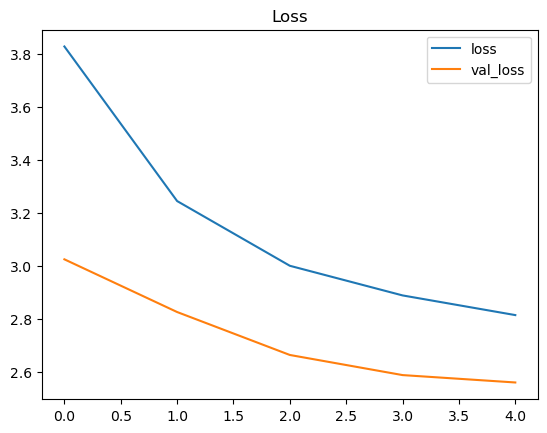

In [89]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

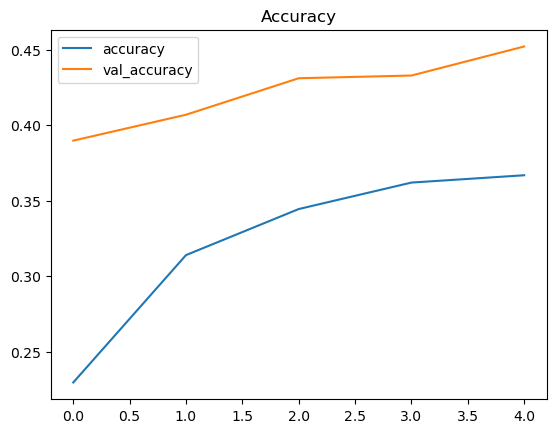

In [90]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

### Evaluation

In [91]:
start_time = time.time()
pred = model.predict(test_images)
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

262/262 [==============================] - 76s 290ms/step
Execution time: 76.62183117866516 seconds


In [94]:
y_test = list(test_df.Label)
acc = accuracy_score(y_test,pred)
print(f'Accuracy on the test set: {acc * 100:.2f}%')

Accuracy on the test set: 45.70%


In [95]:
class_report = classification_report(y_test, pred, zero_division=1)
print(class_report)

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.35      0.14      0.20       365
           agnes_skinner       1.00      0.00      0.00        17
  apu_nahasapeemapetilon       0.51      0.48      0.49       249
           barney_gumble       1.00      0.00      0.00        42
            bart_simpson       0.33      0.40      0.36       537
            carl_carlson       1.00      0.00      0.00        39
charles_montgomery_burns       0.41      0.43      0.42       477
            chief_wiggum       0.47      0.62      0.53       394
         cletus_spuckler       1.00      0.00      0.00        19
          comic_book_guy       0.83      0.23      0.37       188
               disco_stu       1.00      0.00      0.00         3
          edna_krabappel       0.73      0.30      0.42       183
                fat_tony       1.00      0.00      0.00        11
                     gil       1.00      0.00      0.00        11
    groun

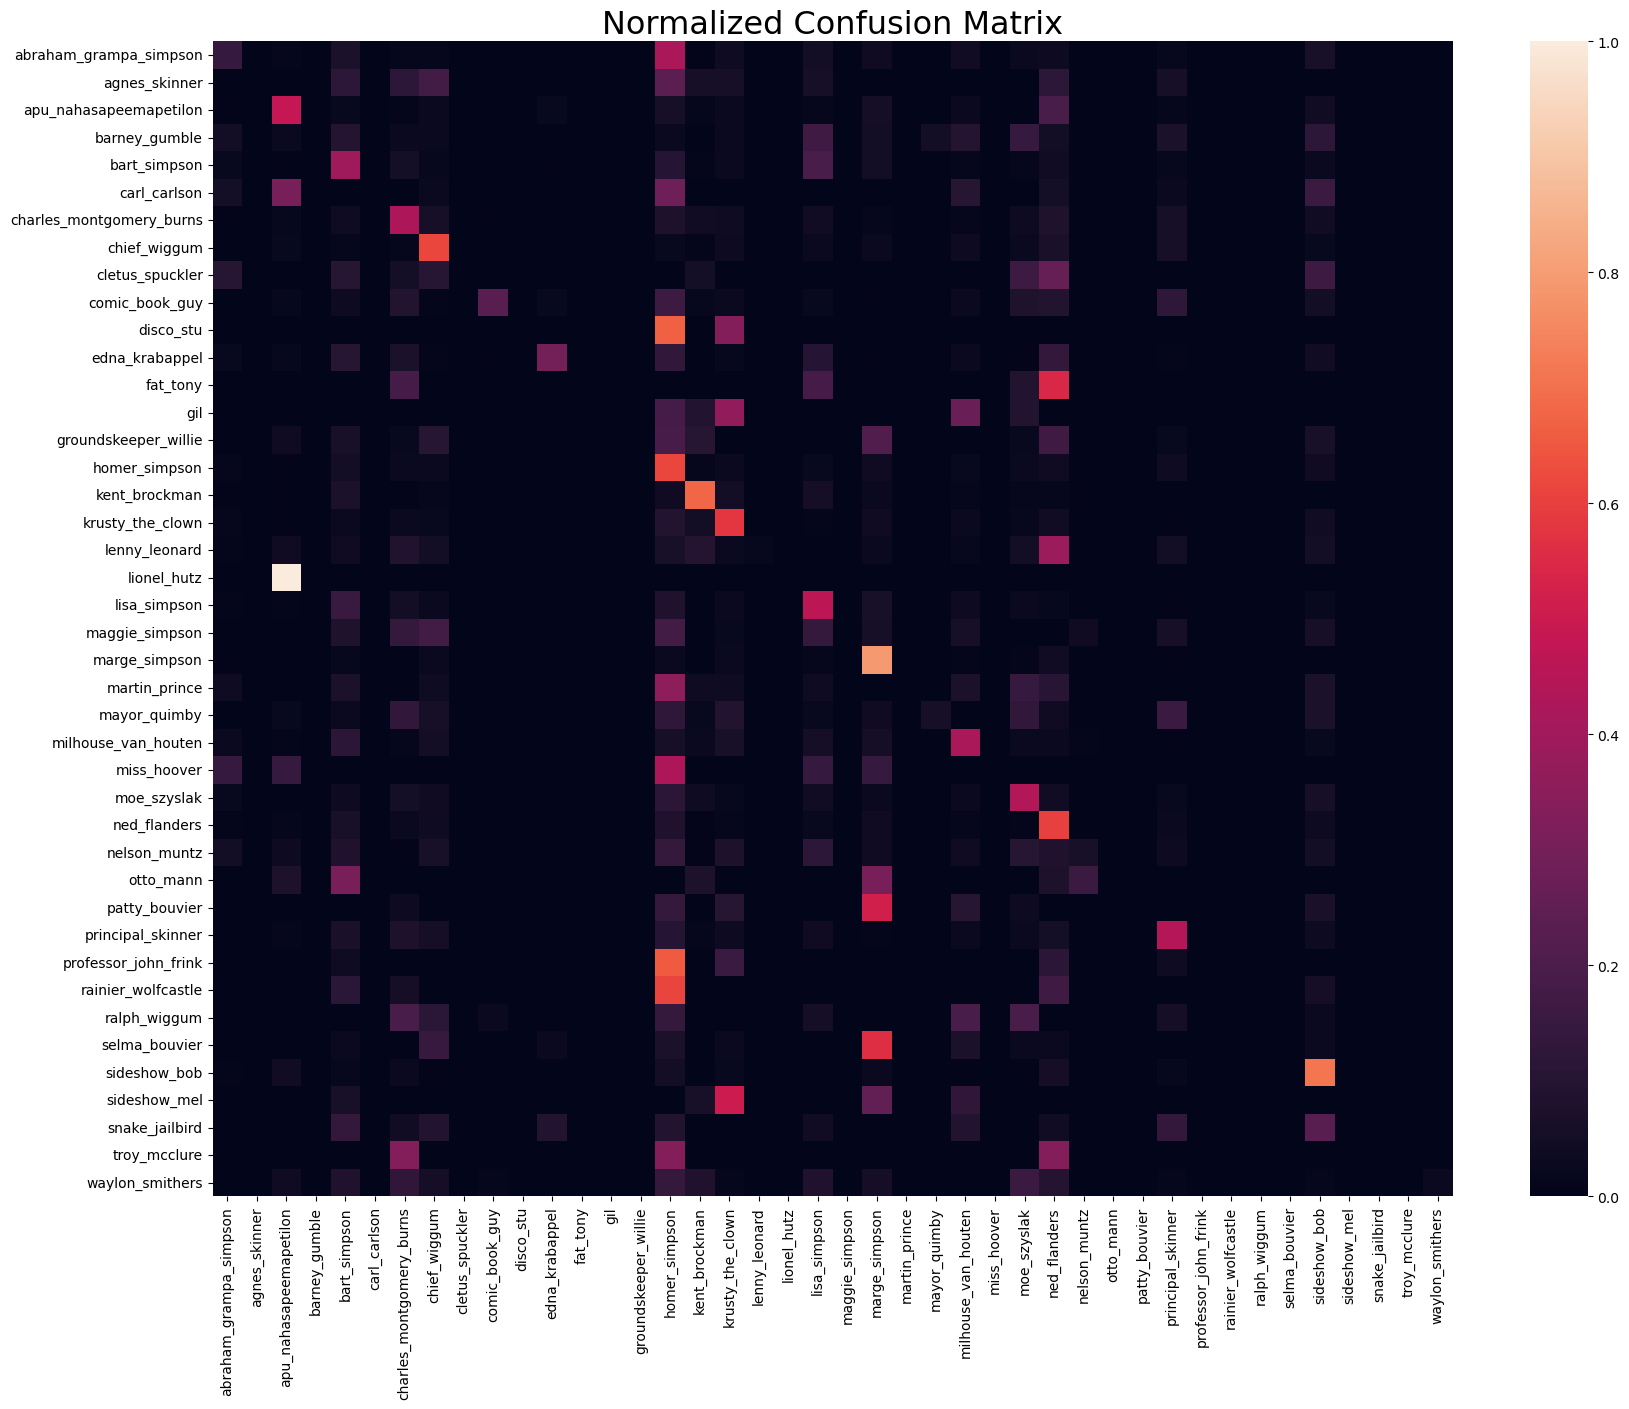

In [103]:
cf_matrix = confusion_matrix(y_test, pred, normalize='true')
plt.figure(figsize = (20,15))
sns.heatmap(cf_matrix, annot=False, xticklabels = sorted(set(y_test)), yticklabels = sorted(set(y_test)))
plt.title('Normalized Confusion Matrix', fontsize = 23)
plt.show()

### Висновки

Інтеграція нормалізації за міні-батчами перед кожним шаром вплинула на кілька аспектів мережі:

 1. Чутливість до ініціалізації ваг: Нормалізація за міні-батчами знизила чутливість мережі до початкових значень ваг. Це означає, що навчання може бути менш залежним від початкової ініціалізації ваг, що поліпшує стабільність та збіжність процесу навчання.

 2. Прискорення процесу навчання:
    Додавання нормалізації за міні-батчами перед кожним шаром посприяло прискоренню процесу навчання (1821.39887 сек після додавання нормалізації, 2197.326 сек до). Нормалізація може допомогти уникнути проблеми з градієнтом великих значень та сприяти швидшій збіжності моделі.

 3. Якість навчання та швидкість навчання:
    Вибір більшого значення швидкості навчання впливає на якість навчання. Велика швидкість навчання може спричинити швидшу збіжність, але може призвести до менш якісного навчання, якщо модель недостатньо пристосовується до даних. Тому важливо уважно налаштовувати швидкість навчання, використовуючи методи адаптивної оптимізації, такі як Adam або RMSprop.

 4. Час надання прогнозу: Додавання нормалізації за міні-батчами перед кожним шаром не повинно суттєво вплинути на час надання прогнозу моделлю. Нормалізація за міні-батчами виконується під час навчання, тому на етапі передбачення (inference) ця операція не потрібна.

# Використовуючи багатошаровий персептрон, спробувати класифiкувати набiр кольорових зображень. Впевнитися, що багатошаровий персептрон не справляється з такою задачею.


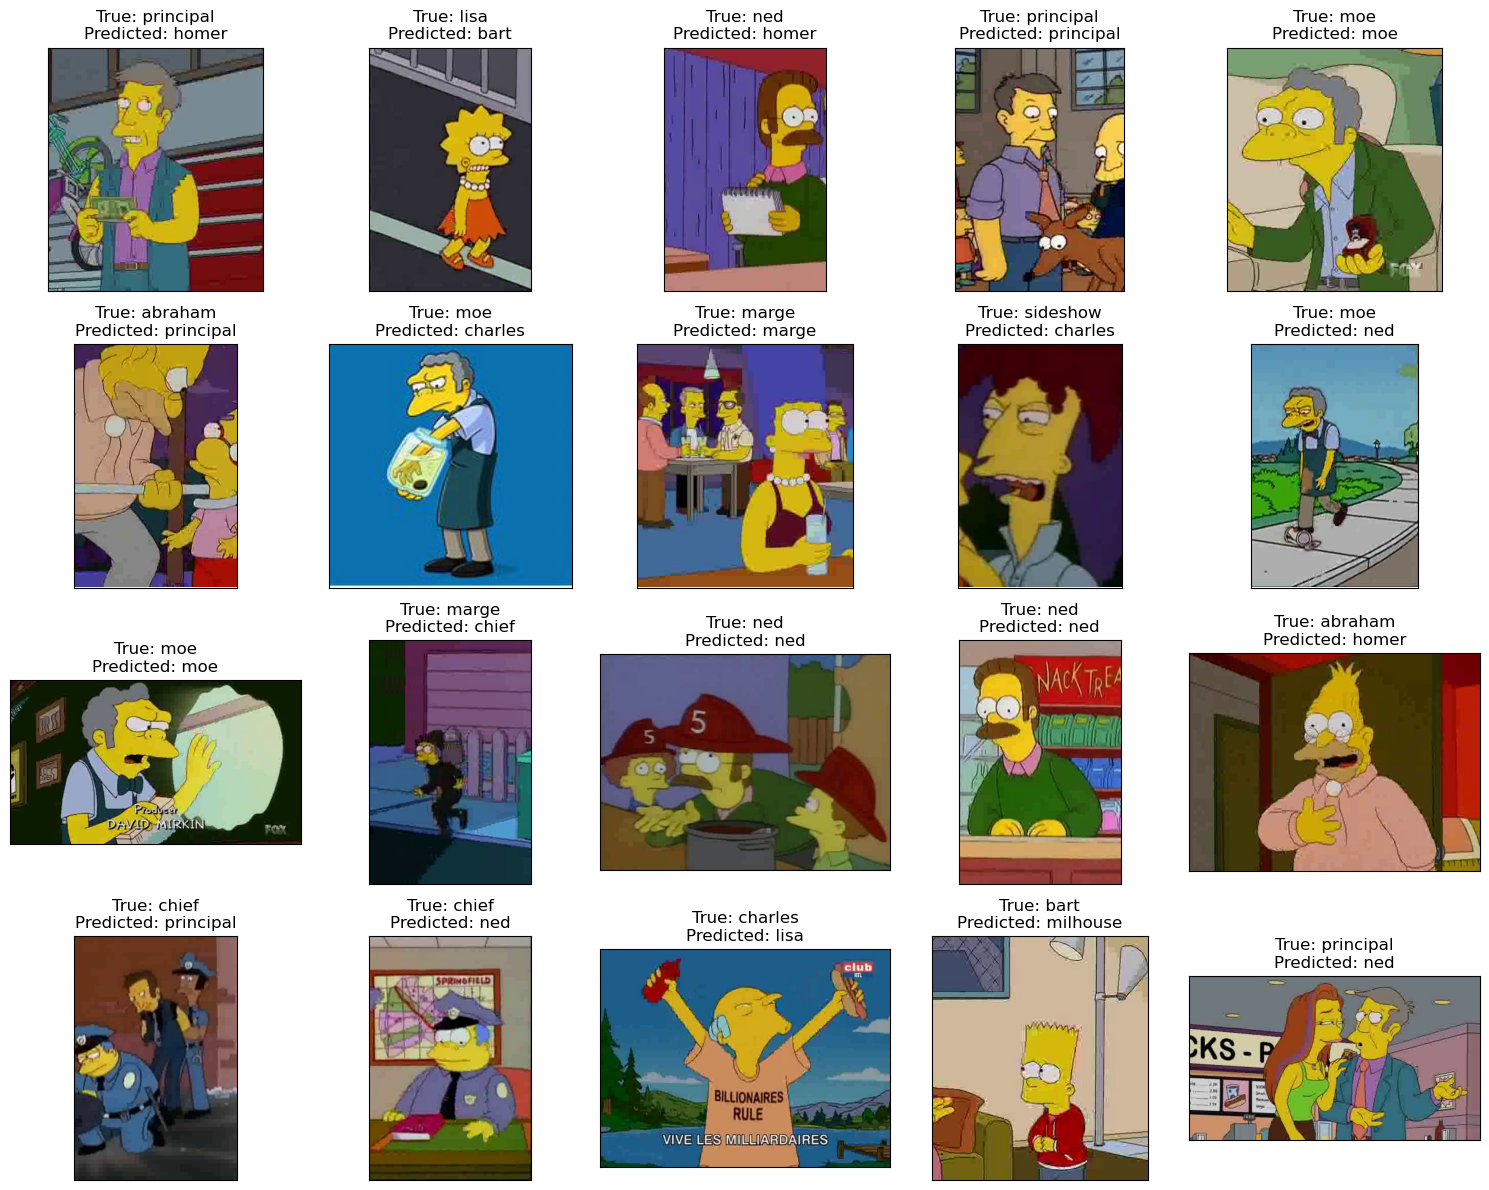

In [102]:
# Display 15 picture of the dataset with their labels
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i].split('_')[0]}\nPredicted: {pred[i].split('_')[0]}")
plt.tight_layout()
plt.show()

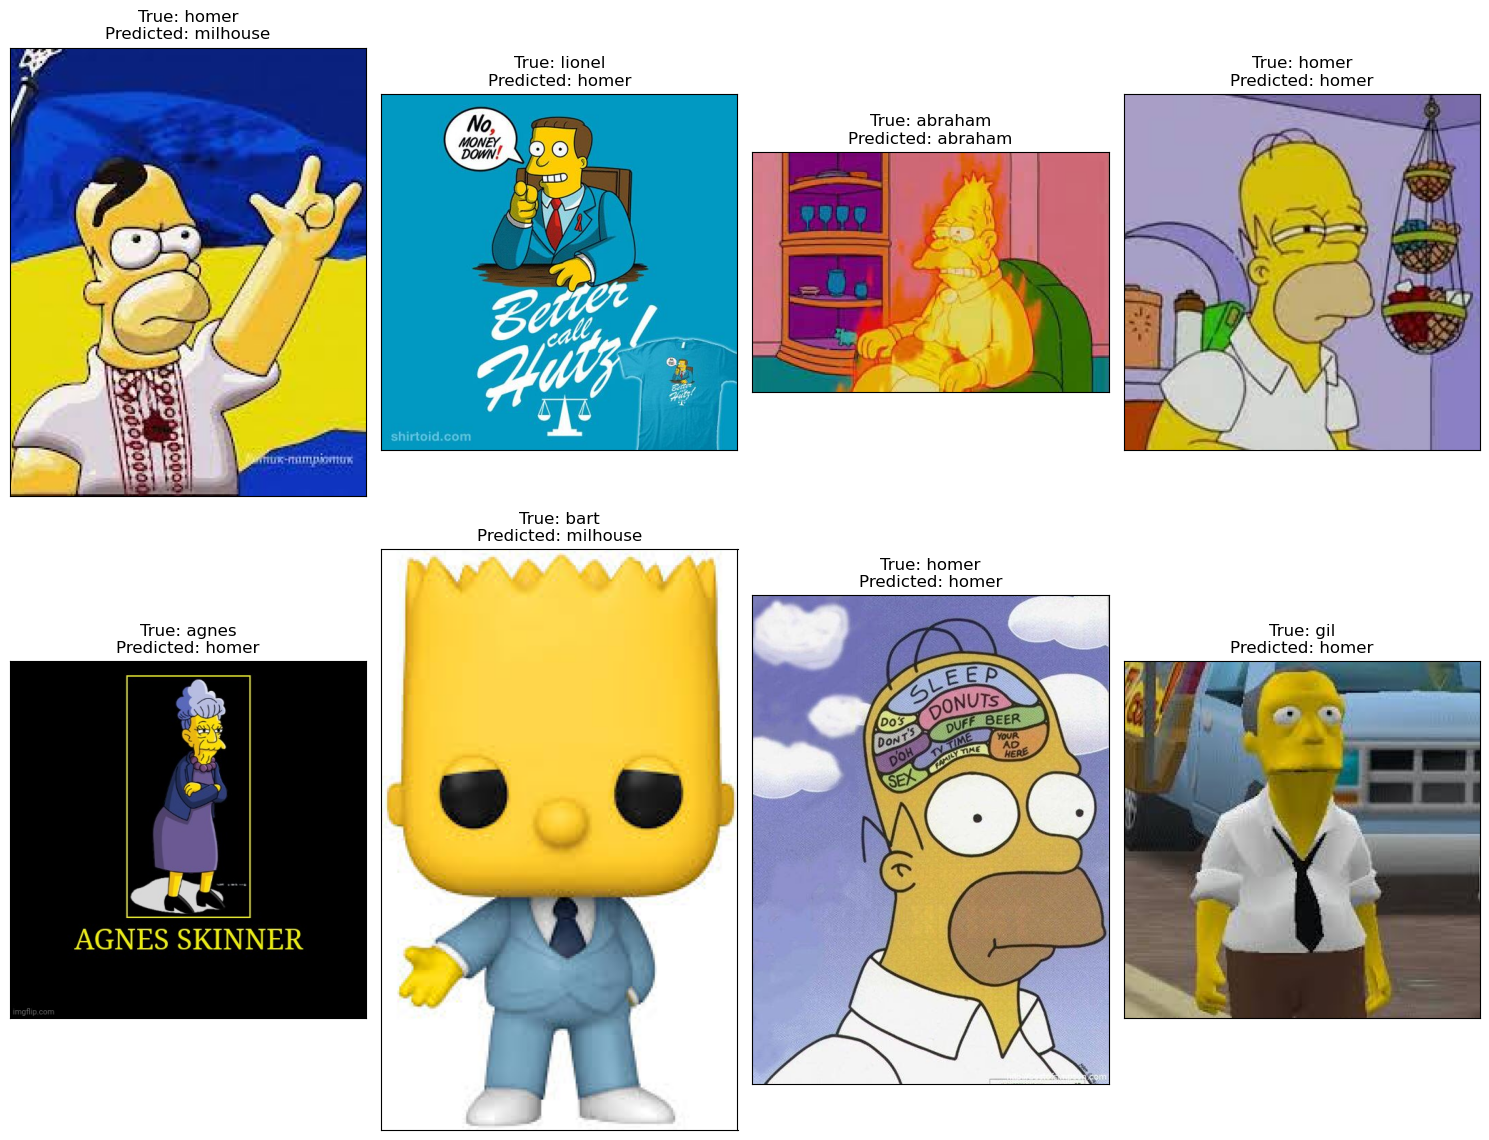

In [101]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(custom_filepaths[i]))
    ax.set_title(f"True: {custom_labels[i].split('_')[0]}\nPredicted: {predict_custom(custom_filepaths[i], print_image = False)[0].split('_')[0]}")
clear_output()
plt.tight_layout()
plt.show()

Провівши експерименти з різними моделями, ми все ще не отримали хорошого показника точності. 

Найкращою за F1 Score виявилася FeedForwardNetwork (F1 score = 0.72 на тестовій вибірці) - вона найкраще класифікує картинки, подібні до тих, що були в датасеті і погано справляється з персонажами, зображеними в інших стилях, отже модель погано узагальнює картинки що містять нові небачені елементи, як-от рамка чи надпис. Також, варто звернути увагу, що датасет був незбалансованим, тому модель погано справляється з розпізнаванням класів, картинок яких було вкрай мало (agnes, gil, lionel hutz), тоді як розпізнавання персонажа homer є більш успішним (таких картинок було найбільше у наборі надих). Рідкісні та популярні картинки добавлено у власноруч зібраний датасет навмисно, щоб продемонструвати це. 

З картинками в нових стилях з новими елементами, краще справляється персептрон з функцією активації LeakyReLU, оптимізатором Adam та нормалiзацiю за мiнi-батчами перед кожним шаром (F1 score = 0.46 на тестовій вибірці) 

В даній роботі вдалося показати, що багатошаровий персептрон дійсно не дуже добре справляється з задачею